# Analysis of LL Pipeline Differential Against Ground Truth
Let's first load the data.

In [ ]:
import pandas as pd
from LLRunner.BMAassumptions import (
    cellnames,
    BMA_final_classes,
    removed_classes,
    omitted_classes,
)

data_path = "/Users/neo/Documents/DATA/aml_pooled_results.csv"

df = pd.read_csv(data_path)

# print how many rows in the data
print("Number of rows in the data: ", df.shape[0])

# count remove all the rows where blast-equivalents column it non-empty
df = df[df["blast-equivalents"].isna()]
print(
    "Number of rows in the data after removing non-empty blast-equivalents: ",
    df.shape[0],
)

# add a few columes to the data frame
# blasts_grouped+L2M1, blasts_grouped-M1L2, lymphocytes_grouped+M1L2, lymphocytes_grouped-L2M1
# blasts_grouped_stacked+L2M1, blasts_grouped_stacked-M1L2, lymphocytes_grouped_stacked+M1L2, lymphocytes_grouped_stacked-L2M1

df["blasts_grouped+L2M1"] = df["blasts_grouped"] + df["L2M1"]
df["blasts_grouped-M1L2"] = df["blasts_grouped"] - df["M1L2"]
df["lymphocytes_grouped+M1L2"] = df["lymphocytes_grouped"] + df["M1L2"]
df["lymphocytes_grouped-L2M1"] = df["lymphocytes_grouped"] - df["L2M1"]

df["blasts_grouped_stacked+L2M1"] = df["blasts_grouped_stacked"] + df["L2M1"]
df["blasts_grouped_stacked-M1L2"] = df["blasts_grouped_stacked"] - df["M1L2"]
df["lymphocytes_grouped_stacked+M1L2"] = df["lymphocytes_grouped_stacked"] + df["M1L2"]
df["lymphocytes_grouped_stacked-L2M1"] = df["lymphocytes_grouped_stacked"] - df["L2M1"]

## Overall Diagnostics
Let's print some dataset overall numbers to get a feel for the results.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df, cellnames, and BMA_final_classes are already defined

# new_cellnames is cellnames removing ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]
new_cellnames = [cellname for cellname in cellnames if cellname not in ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]]

# sum all the cellname_count columns for each row where cellname in cellnames
df['total_count'] = df[[cellname + '_count' for cellname in new_cellnames]].sum(axis=1)

# print the average of the total_count column
print(f"Total count average: {df['total_count'].mean()}")

# for each cellname in the cellnames list, get the average across all rows for that cellname and print it
for cellname in cellnames:
    print(f"{cellname} average: {df[cellname].mean()}")
    print(f"{cellname} std: {df[cellname].std()}")
    print(f"{cellname} median: {df[cellname].median()}")

    print(f"{cellname} stacked average: {df[cellname + '_stacked'].mean()}")
    print(f"{cellname} stacked std: {df[cellname + '_stacked'].std()}")
    print(f"{cellname} stacked median: {df[cellname + '_stacked'].median()}")

    if cellname in ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]:
        continue

    print(f"{cellname} count average: {df[cellname + '_count'].mean()}")
    print(f"{cellname} count std: {df[cellname + '_count'].std()}")
    print(f"{cellname} count median: {df[cellname + '_count'].median()}")

# for each class in the BMA_final_classes list, get the average across all rows for that class and print it
for class_ in BMA_final_classes:
    if class_ == "blast-equivalents":
        continue

    print(f"{class_} average: {df[(class_ + '_grouped')].mean()}")
    print(f"{class_} std: {df[(class_ + '_grouped')].std()}")
    print(f"{class_} median: {df[(class_ + '_grouped')].median()}")

    print(f"{class_} ground truth average: {df[class_].mean()}")
    print(f"{class_} ground truth std: {df[class_].std()}")
    print(f"{class_} ground truth median: {df[class_].median()}")

    print(f"{class_} count average: {df[(class_ + '_grouped_count')].mean()}")
    print(f"{class_} count std: {df[(class_ + '_grouped_count')].std()}")
    print(f"{class_} count median: {df[(class_ + '_grouped_count')].median()}")


############# Cell Classes Plot ####################


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' and lists 'cellnames' and 'BMA_final_classes'
if "blast-equivalents" in BMA_final_classes:
    BMA_final_classes.remove("blast-equivalents")

# Calculate averages for cells and their stacked versions
cell_averages = pd.DataFrame([{cellname: df[cellname].mean() for cellname in cellnames}])
cell_stacked_averages = pd.DataFrame([{cellname + '_stacked': df[cellname + '_stacked'].mean() for cellname in cellnames}])

# Convert DataFrames to long format for plotting
cell_data = pd.concat([cell_averages, cell_stacked_averages], axis=1).reset_index(drop=True).melt(var_name='Metric', value_name='Value')

# Order metrics to ensure each X is next to X_stacked
order = [item for sublist in zip(cell_averages.columns, cell_stacked_averages.columns) for item in sublist]
cell_data['Metric'] = pd.Categorical(cell_data['Metric'], order)
cell_data.sort_values('Metric', inplace=True)

# Create a color palette that helps to differentiate between X and X_stacked
palette = {metric: 'blue' if '_stacked' not in metric else 'green' for metric in cell_data['Metric'].unique()}

# Plotting the data
plt.figure(figsize=(12, 10))
sns.barplot(data=cell_data, x='Metric', y='Value', hue='Metric', palette=palette, dodge=False)
plt.title('Comparison of Cells and Their Stacked Versions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()





############# Grouped classes Plot ####################

# Assuming you have a DataFrame 'df' and lists 'cellnames' and 'BMA_final_classes'
if "blast-equivalents" in BMA_final_classes:
    BMA_final_classes.remove("blast-equivalents")

# Calculate averages for class, class grouped, and class grouped stacked
class_averages = pd.DataFrame([{class_name: df[class_name].mean() for class_name in BMA_final_classes}])
class_grouped_averages = pd.DataFrame([{class_name + '_grouped': df[class_name + '_grouped'].mean() for class_name in BMA_final_classes}])
class_grouped_stacked_averages = pd.DataFrame([{class_name + '_grouped_stacked': df[class_name + '_grouped_stacked'].mean() for class_name in BMA_final_classes}])

# Convert DataFrames to long format for plotting
class_data = pd.concat([class_averages, class_grouped_averages, class_grouped_stacked_averages], axis=1).reset_index(drop=True).melt(var_name='Metric', value_name='Value')

# Order metrics to ensure X, X_grouped, and X_grouped_stacked are grouped correctly
order = [item for sublist in zip(class_averages.columns, class_grouped_averages.columns, class_grouped_stacked_averages.columns) for item in sublist]
class_data['Metric'] = pd.Categorical(class_data['Metric'], order)
class_data.sort_values('Metric', inplace=True)

# Create a color palette that helps to differentiate between X, X_grouped, and X_grouped_stacked
palette = {metric: 'blue' if '_grouped' not in metric and '_stacked' not in metric else ('green' if '_grouped' in metric and '_stacked' not in metric else 'red') for metric in class_data['Metric'].unique()}

# Plotting the data
plt.figure(figsize=(18, 10))  # Adjust figure size as necessary
sns.barplot(data=class_data, x='Metric', y='Value', hue='Metric', palette=palette, dodge=False)
plt.title('Comparison of Class Metrics: Standard, Grouped, and Grouped Stacked')
plt.xticks(rotation=90)  # Adjust rotation if necessary
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example columns, ensure your df has these columns
columns_blasts = [
    'blasts', 'blasts_grouped', 'blasts_grouped_stacked', 
    'blasts_grouped+L2M1', 'blasts_grouped-M1L2', 
    'blasts_grouped_stacked+L2M1', 'blasts_grouped_stacked-M1L2'
]
columns_lymphocytes = [
    'lymphocytes', 'lymphocytes_grouped', 'lymphocytes_grouped_stacked', 
    'lymphocytes_grouped+M1L2', 'lymphocytes_grouped-L2M1', 
    'lymphocytes_grouped_stacked+M1L2', 'lymphocytes_grouped_stacked-L2M1'
]

# Create a single-row DataFrame with explicit index
blasts_averages = {col: df[col].mean() for col in columns_blasts}
lymphocytes_averages = {col: df[col].mean() for col in columns_lymphocytes}

blasts_data = pd.DataFrame([blasts_averages], index=[0]).melt(var_name='Metric', value_name='Value')
lymphocytes_data = pd.DataFrame([lymphocytes_averages], index=[0]).melt(var_name='Metric', value_name='Value')

# Order and plot the data
blasts_order = columns_blasts
lymphocytes_order = columns_lymphocytes

blasts_data['Metric'] = pd.Categorical(blasts_data['Metric'], blasts_order)
lymphocytes_data['Metric'] = pd.Categorical(lymphocytes_data['Metric'], lymphocytes_order)

# Plotting blasts data
plt.figure(figsize=(18, 10))
sns.barplot(data=blasts_data, x='Metric', y='Value', hue='Metric', dodge=False)
plt.title('Comparative Analysis of Blasts Categories')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Plotting lymphocytes data
plt.figure(figsize=(18, 10))
sns.barplot(data=lymphocytes_data, x='Metric', y='Value', hue='Metric', dodge=False)
plt.title('Comparative Analysis of Lymphocytes Categories')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


## Dot & Identity Line Plots
Plotting a 2D dot plot for any two columns and the identity line y=x.

In [ ]:
from sklearn.linear_model import LinearRegression

def dot_and_identity_line(column_1, column_2, intercept=False):
    """Plot a scatter plot of two columns in df with a line of y=x."""
    import matplotlib.pyplot as plt

    plt.scatter(df[column_1], df[column_2], alpha=0.2)

    # first create new_df with only the two columns and drop any rows with NaN values and print the number of rows removed
    new_df = df[[column_1, column_2]]

    # print the number of rows removed and total number of rows
    print("Number of rows removed: ", len(df) - len(new_df))
    print("Total number of rows: ", len(df))

    # drop any rows with NaN values
    new_df = new_df.dropna()

    X = new_df[[column_1]]
    y = new_df[column_2]

    model = LinearRegression(fit_intercept=intercept)
    model.fit(X, y)

    plt.plot(new_df[column_1], model.predict(X), color="green")
    
    # Add a line for the function f(x) = x by creating two lists of points that are identical
    x = list(range(int(max(df[column_1].max(), df[column_2].max()))))
    plt.plot(x, x, color='red')

    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()


for celltype in BMA_final_classes:
    dot_and_identity_line(f"{celltype}_grouped", celltype)
    # print the average of blasts_grouped_count
    print(df[f"{celltype}_grouped_count"].mean())

    dot_and_identity_line(f"{celltype}_grouped_stacked", celltype)
    # print the average of blasts_grouped_count
    print(df[f"{celltype}_grouped_count"].mean())

## Dot and LR Plot
Make a dot plot and run a linear regression line through the dot plot.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def dot_and_linear_regression(column_1, column_2, intercept=False):
    """Plot a scatter plot of two columns in df with a linear regression line.
    Convention, column_1 will always be multiplied by 100.
    If intercept is True, the line will have an intercept. Else, the line must pass through the origin.
    """

    # first create new_df with only the two columns and drop any rows with NaN values and print the number of rows removed
    new_df = df[[column_1, column_2]]

    # print the number of rows removed and total number of rows
    print("Number of rows removed: ", len(df) - len(new_df))
    print("Total number of rows: ", len(df))

    # drop any rows with NaN values
    new_df = new_df.dropna()

    X = new_df[[column_1]]
    y = new_df[column_2]

    model = LinearRegression(fit_intercept=intercept)
    model.fit(X, y)

    plt.scatter(new_df[column_1], new_df[column_2])
    plt.plot(new_df[column_1], model.predict(X), color="red")
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()

    # print the slope and intercept of the line
    print("Slope: ", model.coef_[0])
    if intercept:
        print("Intercept: ", model.intercept_)
    else:
        print("Intercept: Turned off")

for celltype in BMA_final_classes:
    dot_and_linear_regression(f"{celltype}_grouped", celltype, intercept=False)
    # Also print the average grouped count
    print(df[f"{celltype}_grouped_count"].mean())

    dot_and_linear_regression(f"{celltype}_grouped_stacked", celltype, intercept=False)
    # Also print the average grouped count
    print(df[f"{celltype}_grouped_count"].mean())

# M1L2 and L2M1 Experiments

In [ ]:
# make the dot plot comparing each of the new blastsX columns with the corresponding ground truth column blasts
dot_and_identity_line("blasts_grouped+L2M1", "blasts")
dot_and_identity_line("blasts_grouped-M1L2", "blasts")
dot_and_identity_line("lymphocytes_grouped+M1L2", "lymphocytes")
dot_and_identity_line("lymphocytes_grouped-L2M1", "lymphocytes")


do_intercept = False
dot_and_linear_regression("blasts_grouped+L2M1", "blasts", intercept=do_intercept)
dot_and_linear_regression("blasts_grouped-M1L2", "blasts", intercept=do_intercept)
dot_and_linear_regression(
    "lymphocytes_grouped+M1L2", "lymphocytes", intercept=do_intercept
)
dot_and_linear_regression(
    "lymphocytes_grouped-L2M1", "lymphocytes", intercept=do_intercept
)

# BUCKET TESTS FOR NORMAL SLIDES
The normal reference ranges for the different grouped celltypes is given by.

Myeloblasts (blasts): 0-3

Promyelocytes: 2-8

Myelocytes: 10-13

Metamyelocytes: 10-15

Bands/neutrophils: 25-40

Eosinophils & precursors (eosinophils): 1-3

Basophils % precursors (basophils): 0-1

Monocytes: 0-1

Erythroblasts: 0-2

Other erythroid elements: 15-25

(I believe this means that erythroid precursors range is 15-27)

Lymphocytes: 10-15

Plasma cells: 0-1

In [9]:
# Configure all the cell classes bucket classification tasks for normal BMA WSIs

print(BMA_final_classes)
grouped_class_buckets = {
    "blasts": (0, 3),
    "promyelocytes": (2, 8),
    "myelocytes": (10, 13),
    "metamyelocytes": (10, 15),
    "neutrophils/bands": (25, 40),
    "eosinophils": (1, 3),
    "monocytes": (0, 1),
    "erythroid precursors": (15, 27),
    "lymphocytes": (10, 15),
    "plasma cells": (0, 1),
}

assert set(grouped_class_buckets.keys()) == set(BMA_final_classes)

['blasts', 'promyelocytes', 'myelocytes', 'metamyelocytes', 'neutrophils/bands', 'monocytes', 'eosinophils', 'erythroid precursors', 'lymphocytes', 'plasma cells']


In [10]:
# Check how many percent of data is in each bucket
for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    print(
        f"Percentage of data in {class_} bucket: ",
        len(df[(df[class_] >= lower) & (df[class_] <= upper)]) / len(df) * 100,
    )
for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    print(
        f"Percentage of data in {class_} bucket: ",
        len(df[(df[class_ + "_grouped"] >= lower) & (df[class_ + "_grouped"] <= upper)])
        / len(df)
        * 100,
    )

for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    print(
        f"Percentage of data in {class_} bucket: ",
        len(
            df[
                (df[class_ + "_grouped_stacked"] >= lower)
                & (df[class_ + "_grouped_stacked"] <= upper)
            ]
        )
        / len(df)
        * 100,
    )

Percentage of data in blasts bucket:  1.3468013468013467
Percentage of data in promyelocytes bucket:  45.45454545454545
Percentage of data in myelocytes bucket:  10.437710437710438
Percentage of data in metamyelocytes bucket:  2.356902356902357
Percentage of data in neutrophils/bands bucket:  7.744107744107744
Percentage of data in monocytes bucket:  29.96632996632997
Percentage of data in eosinophils bucket:  58.58585858585859
Percentage of data in erythroid precursors bucket:  20.53872053872054
Percentage of data in lymphocytes bucket:  12.121212121212121
Percentage of data in plasma cells bucket:  43.77104377104377
Percentage of data in blasts bucket:  0.0
Percentage of data in promyelocytes bucket:  48.821548821548824
Percentage of data in myelocytes bucket:  4.377104377104377
Percentage of data in metamyelocytes bucket:  11.11111111111111
Percentage of data in neutrophils/bands bucket:  0.0
Percentage of data in monocytes bucket:  0.0
Percentage of data in eosinophils bucket:  20.

/var/folders/zx/110vj4gn1x99xh2g_f2kdz_h0000gn/T/ipykernel_15638/4249802579.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(classes, rotation=45, ha='right')  # Rotate labels


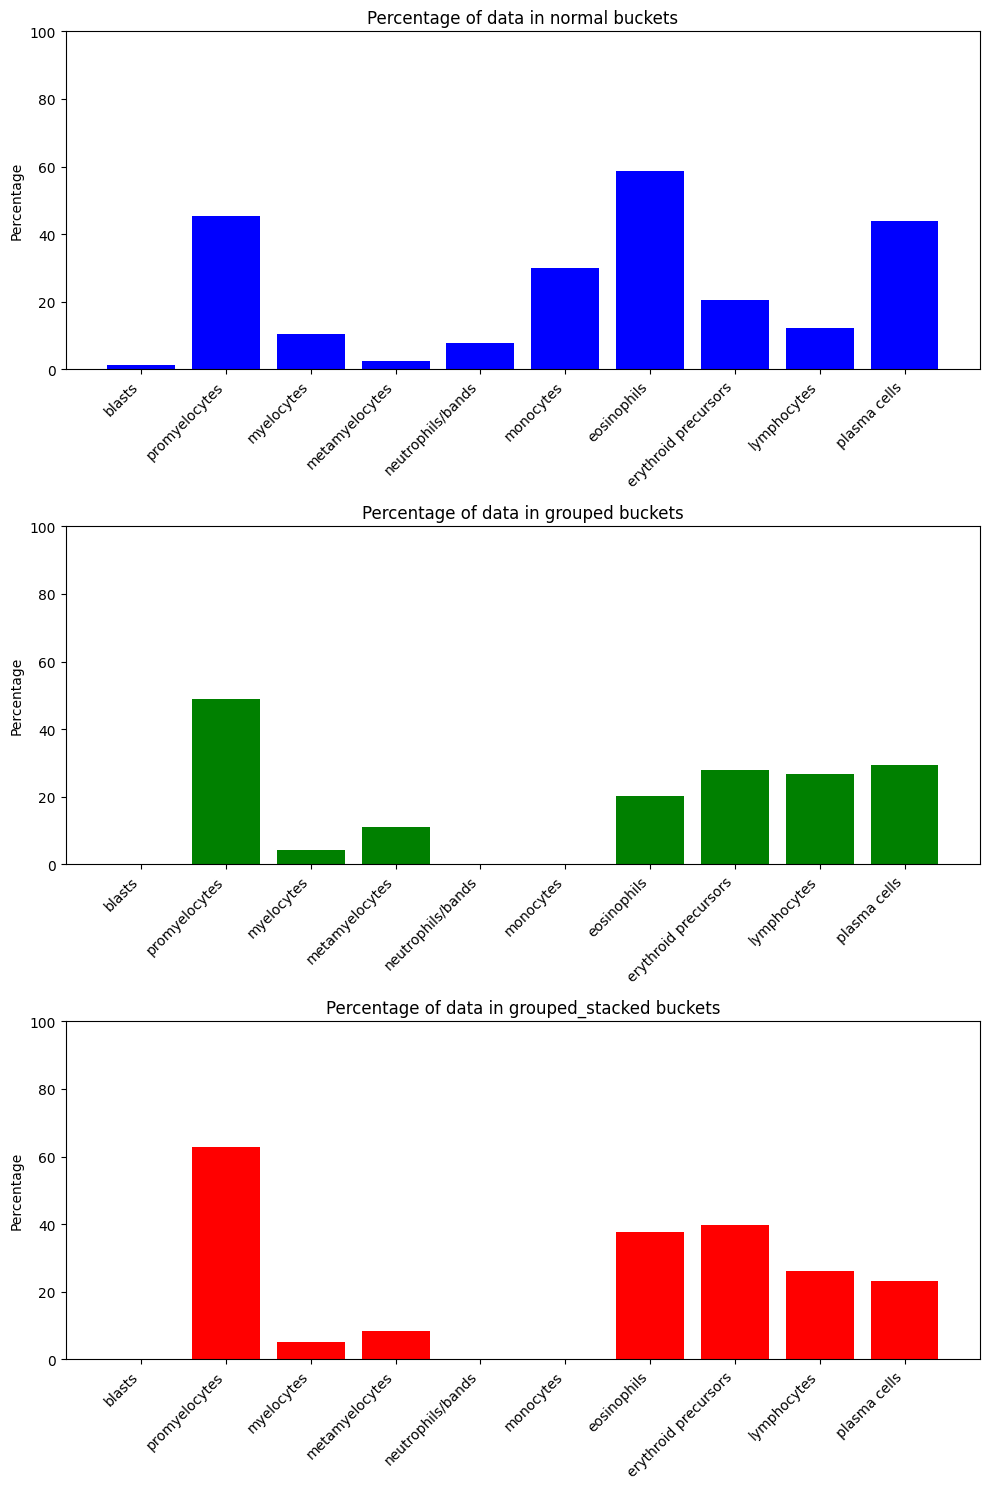

In [13]:
import matplotlib.pyplot as plt

# Data setup (Assuming df and BMA_final_classes, grouped_class_buckets are predefined)
percentages = {'normal': [], 'grouped': [], 'grouped_stacked': []}
classes = []

# Calculate percentages for each class and bucket type
for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    normal_count = len(df[(df[class_] >= lower) & (df[class_] <= upper)]) / len(df) * 100
    grouped_count = len(df[(df[class_ + "_grouped"] >= lower) & (df[class_ + "_grouped"] <= upper)]) / len(df) * 100
    stacked_count = len(df[(df[class_ + "_grouped_stacked"] >= lower) & (df[class_ + "_grouped_stacked"] <= upper)]) / len(df) * 100
    
    percentages['normal'].append(normal_count)
    percentages['grouped'].append(grouped_count)
    percentages['grouped_stacked'].append(stacked_count)
    classes.append(class_)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))  # Create 3 subplots for each bucket type

# Plot settings for all plots
for i, key in enumerate(['normal', 'grouped', 'grouped_stacked']):
    ax[i].bar(classes, percentages[key], color=['blue', 'green', 'red'][i])
    ax[i].set_title(f'Percentage of data in {key} buckets')
    ax[i].set_ylabel('Percentage')
    ax[i].set_ylim(0, 100)
    ax[i].set_xticklabels(classes, rotation=45, ha='right')  # Rotate labels

plt.tight_layout()
plt.show()
